In [11]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
from astropy.table import Table
from scipy.interpolate import interp1d
import read_mist_models
import sys
sys.path.append('..')
import analysis_utils

highlight = np.array((66, 135, 245))/255
red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'
pl.rc('image', cmap='plasma')

In [12]:
import os
data = pd.DataFrame()
for file in os.listdir('../output/txtoutput'):
    print("reading file: {0}".format(file))
    if file != 'allcampaigns.txt':
        data = data.append(pd.read_csv('../output/txtoutput/'+file, skiprows=1, delimiter='\t'))

reading file: out8.dat
reading file: out18.dat
reading file: out16.dat
reading file: out112.dat
reading file: out17.dat
reading file: out15.dat
reading file: out111.dat
reading file: out14.dat
reading file: out13.dat
reading file: out102.dat
reading file: out12.dat
reading file: out3.dat
reading file: out2.dat
reading file: out0.dat
reading file: out1.dat
reading file: out5.dat
reading file: out4.dat
reading file: out6.dat
reading file: out7.dat


In [13]:
k2dr2 = Table.read('k2_dr2_1arcsec.fits', format='fits')
k2dr2 = k2dr2.to_pandas()
df = pd.merge(k2dr2, data, left_on='epic_number', right_on='epic')
df = df.drop_duplicates(subset='epic_number')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'k2_kepmagerr' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
import imp
imp.reload(analysis_utils)
ms = analysis_utils.selectms(
    df, 
    'MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd', 
    bp_rp_range=(0.0, 5.0),
    g_rp_range=(0.0, 5.0),
    width=(-0.6, 0.6)
)

Reading in: MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.25, 3.5)

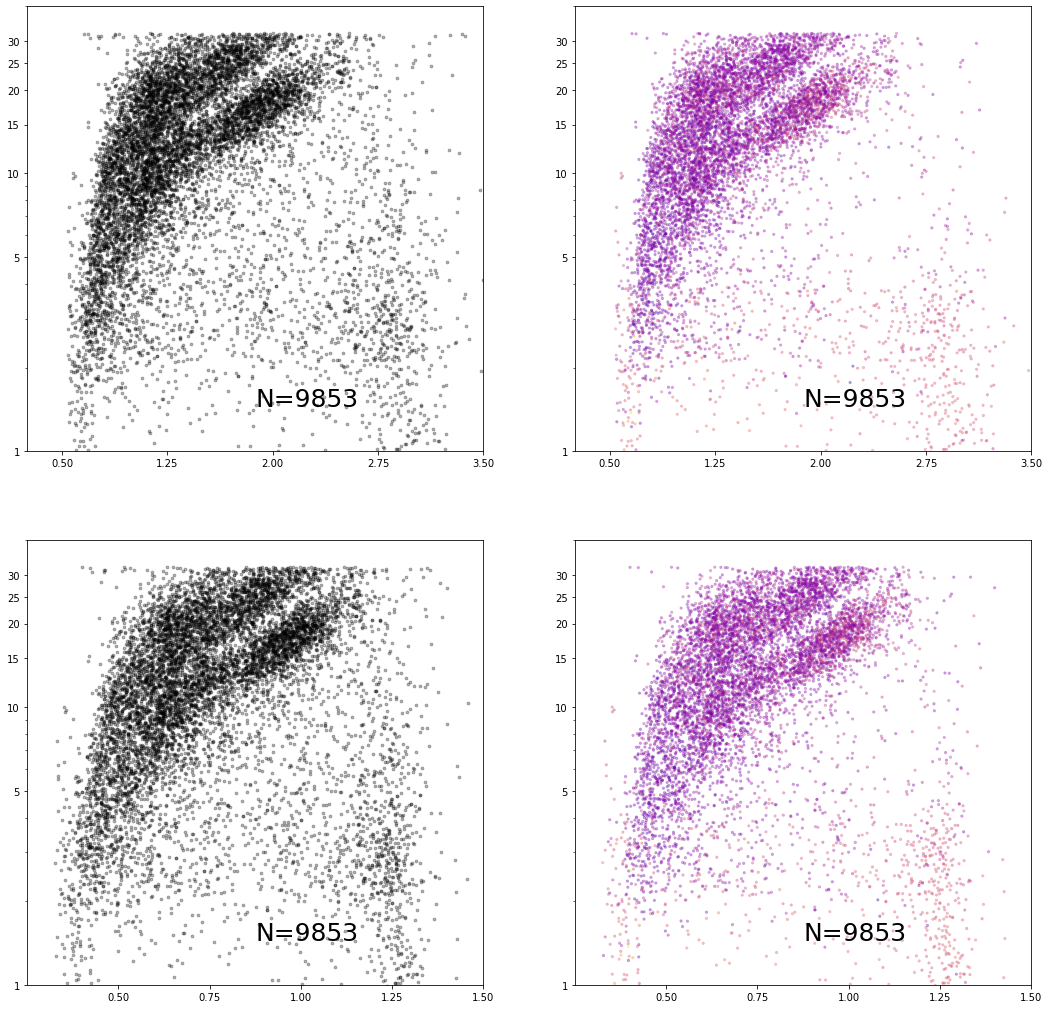

In [15]:
good_P = ms['P_mean'] / ms['P_sd'] > 15
good_P = good_P & (ms['P_mean'] < 32)
#good_P = good_P & (np.abs(ms['P_r_hat'] - 1.0) < 0.1)
good_P = good_P & ((ms['logamp_mean'] - ms['logS0_mean']) > np.log(1e-3))
#good_P = good_P & (ms['mix_mean'] > 0.15)
#color = ms['P_mean'] - ms['P_mode']
#color = ms['mix_mode']
tau1 = ms['P_mean']*np.sqrt(np.exp(ms['logQ0_mean'])**2 - 1)
tau2 = ms['P_mean']*np.sqrt((np.exp(ms['logQ0_mean'])+ np.exp(ms['logdQ_mean']))**2 - 1)
color = np.log(tau1 + tau2)

fig, axs = pl.subplots(2, 2, figsize=(18, 18))
axs[0, 0].semilogy(ms[good_P]['bp_rp'], ms[good_P]['P_mean'], 'o', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3, markersize=3)
axs[0, 1].scatter(ms[good_P]['bp_rp'], ms[good_P]['P_mean'], c=color[good_P], alpha=0.3, s=5)
axs[0, 1].set_yscale('log')

axs[1, 0].semilogy(ms[good_P]['g_rp'], ms[good_P]['P_mean'], 'o', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3, markersize=3)
axs[1, 1].scatter(ms[good_P]['g_rp'], ms[good_P]['P_mean'], c=color[good_P], alpha=0.3, s=5)
axs[1, 1].set_yscale('log')

#axs[2, 0].semilogy(ms[good_P]['phot_g_mean_mag']-ms[good_P]['Ksmag'], ms[good_P]['P_mean'], 'o', color='k', 
#            markeredgewidth=0.75, markeredgecolor='k', alpha=1, markersize=2)
#axs[2, 1].scatter(ms[good_P]['phot_g_mean_mag']-ms[good_P]['Ksmag'], ms[good_P]['P_mean'], c=color[good_P], alpha=1, s=3)
#axs[2, 1].set_yscale('log')

[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in axs.flatten()]
[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in axs.flatten()]
[ax.set_xticks(np.linspace(0.5, 3.5, 5)) for ax in axs[0]]
[ax.set_xticks(np.linspace(0.5, 1.5, 5)) for ax in axs[1]]
#[ax.set_xticks(np.linspace(0.5, 4.5, 5)) for ax in axs[2]]
[ax.annotate('N={0}'.format(np.sum(good_P)), xy=(0.5, 0.1), 
            xycoords='axes fraction', fontsize=25) for ax in axs.flatten()]
[ax.set_ylim(1, 40) for ax in axs.flatten()]
#[ax.axhline(0.5) for ax in axs.flatten()]
axs[1, 0].set_xlim(0.25, 1.5)
axs[1, 1].set_xlim(0.25, 1.5)
axs[0, 0].set_xlim(0.25, 3.5)
axs[0, 1].set_xlim(0.25, 3.5)
#axs[2, 0].set_xlim(0.5, 4.5)
#axs[2, 1].set_xlim(0.5, 4.5)

(0.3, 1.4)

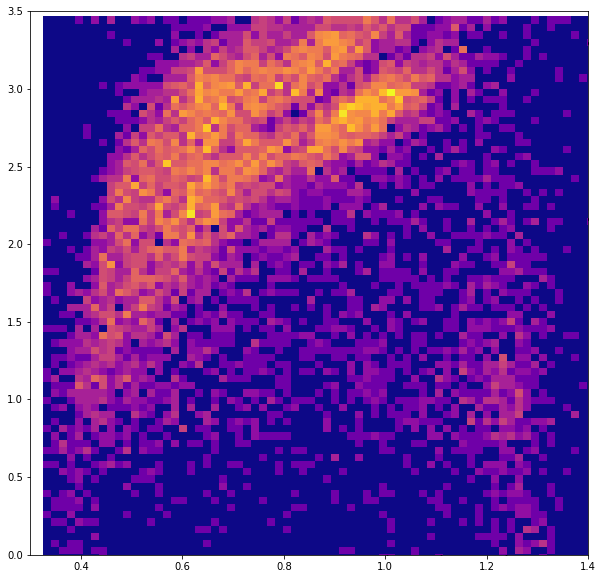

In [16]:
from matplotlib import colors
pl.figure(figsize=(10, 10))
h = pl.hist2d(ms[good_P]['g_rp'], np.log(ms[good_P]['P_mean']), bins=100, cmin=0, norm=colors.PowerNorm(0.5), zorder=0.5)
#pl.yscale('log')
pl.scatter(ms[good_P]['g_rp'], np.log(ms[good_P]['P_mean']), s=2, color='k', zorder=0)
pl.ylim(0, 3.5)
pl.xlim(0.3, 1.4)

(0.3, 1.4)

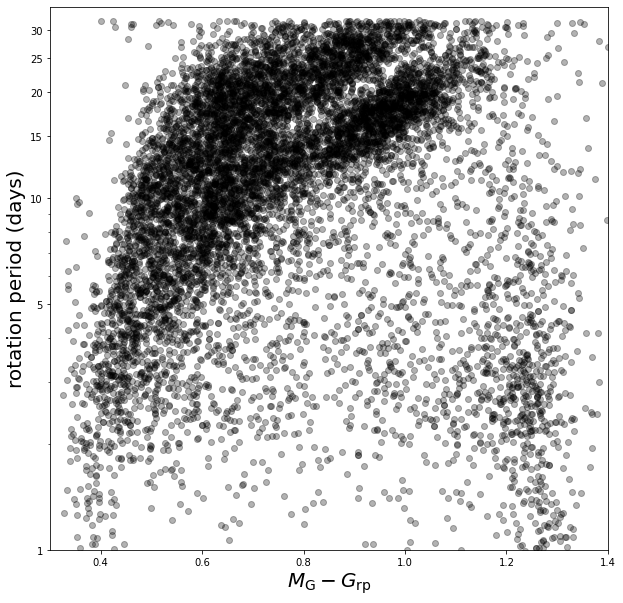

In [17]:
pl.figure(figsize=(10, 10))
pl.semilogy(ms[good_P]['g_rp'], ms[good_P]['P_mean'], 'ko', alpha=0.3)
pl.yscale('log')
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
pl.xlabel(r'$M_\mathrm{G} - G_\mathrm{rp}$', fontsize=20)
pl.ylabel('rotation period (days)', fontsize=20)
pl.savefig('/Users/tgordon/Desktop/period_color.pdf')
pl.ylim(1, 35)
pl.xlim(0.3, 1.4)

/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0, 0.5, '$\\tau$'), Text(0, 0.5, '$\\tau$')]

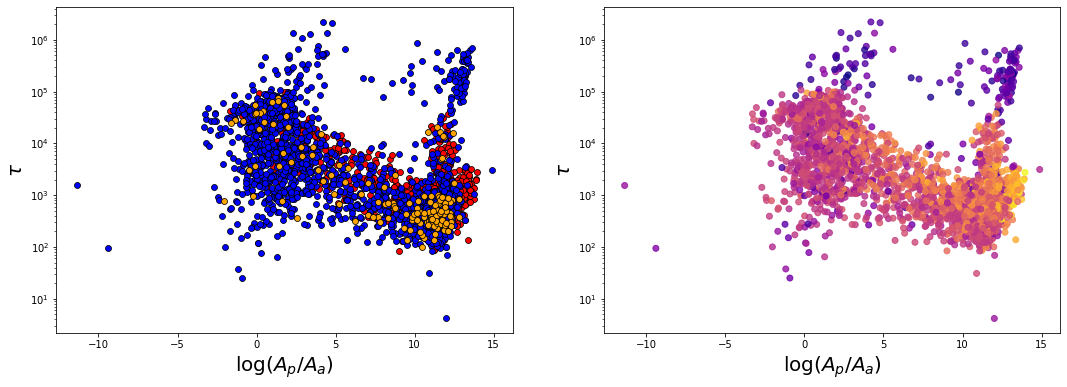

In [18]:
x0u, au, bu = -0.91, -25.69, 23.95
upper = lambda x: (au*(x-x0u)**0.5) + (bu*(x-x0u))
x0l, al, bl, cl = 1.32, 83.66, -157.97, 109.55
lower = lambda x: (al*(x-x0l)**0.5) + (bl*(x-x0l)) + (cl*(x-x0l)**(3/2))

good_P = ms['P_mean'] / ms['P_sd'] > 20
good_P = good_P & (ms['P_mean'] < 38)
good_P = good_P & (np.abs(ms['P_r_hat'] - 1.0) < 0.1)
#good_P = good_P & ((ms['logamp_mean'] - ms['logS0_mean']) > np.log(1e-3))
#good_P = good_P & (ms['mix_mean'] > 0.15)
#good_P = good_P & (ms['mix_mean'] < 0.85)
good_P = good_P & (ms['bp_rp'] > 1.4) & (ms['bp_rp'] < 2.4)
color = ms['P_mean'] - upper(ms['bp_rp'])
tau1 = ms['P_mean']*np.sqrt(np.exp(ms['logQ0_mean'])**2 - 1)
tau2 = ms['P_mean']*np.sqrt((np.exp(ms['logQ0_mean'])+ np.exp(ms['logdQ_mean']))**2 - 1)
logaharm_amp = ms['logS0_mean'] + ms['logw_mean'] - np.log(np.sqrt(2))

x0u, au, bu = -0.91, -25.69, 23.95
upper = lambda x: (au*(x-x0u)**0.5) + (bu*(x-x0u))
x0l, al, bl, cl = 1.32, 83.66, -157.97, 109.55
lower = lambda x: (al*(x-x0l)**0.5) + (bl*(x-x0l)) + (cl*(x-x0l)**(3/2))
above = good_P & (ms['P_mean'] > upper(ms['bp_rp']))
middle = good_P & (ms['P_mean'] < upper(ms['bp_rp'])) & (ms['P_mean'] > lower(ms['bp_rp']))
below = good_P & (ms['P_mean'] < lower(ms['bp_rp']))

key_x = 'P_mean'
key_y = 'logS0_mean'
x = ms[good_P]['logamp_mean'] - logaharm_amp[good_P]# - upper(ms[good_P]['bp_rp'])
#x = ms[good_P]['P_mean']
y = tau2[good_P] + tau1[good_P]
#x = resid_P[good_P]

xf = ms[above]['logamp_mean'] - logaharm_amp[above]# - upper(ms[above]['bp_rp'])
#xf = ms[above]['P_mean']
yf = tau2[above] + tau1[above]
#yf = resid_P[good_P & above]
xs = ms[below]['logamp_mean'] - logaharm_amp[below]# - upper(ms[below]['bp_rp'])
#xs = ms[below]['P_mean']
ys = tau2[below] + tau1[below]
#ys = resid_P[good_P & below]

xm = ms[middle]['logamp_mean'] - logaharm_amp[middle]# - upper(ms[middle]['bp_rp'])
#xm = ms[middle]['P_mean']
ym = tau2[middle] + tau1[middle]
#ym = resid_P[good_P & middle]

fig, axs = pl.subplots(1, 2, figsize=(18, 6))
#axs[0].plot(x, y, 'o', color='k', 
#            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3)
axs[1].scatter(x, y, c=color[good_P], alpha=0.8)

axs[0].plot(xf, yf, 'o', color='r', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
axs[0].plot(xs, ys, 'o', color='b', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
axs[0].plot(xm, ym, 'o', color='orange', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)

[ax.set_yscale('log') for ax in axs]
[ax.set_xlabel(r'log$(A_p/A_a)$', fontsize=20) for ax in axs]
[ax.set_ylabel(r'$\tau$', fontsize=20) for ax in axs]
#[ax.set_xlim(0, 0.5*1e6) for ax in axs]
#[ax.axvline(1) for ax in axs]

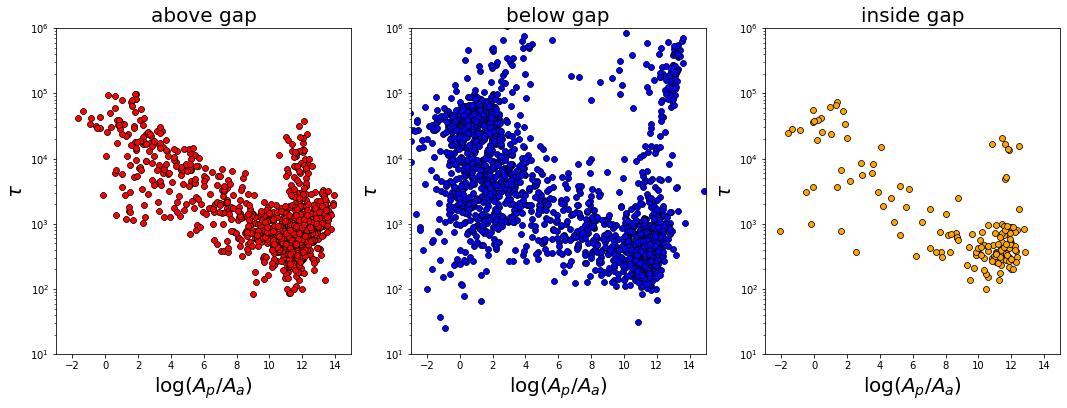

In [19]:
fig, axs = pl.subplots(1, 3, figsize=(18, 6))
#axs[0].plot(x, y, 'o', color='k', 
#            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3)
#axs[1].scatter(x, y, c=color[good_P], alpha=0.8)

axs[0].plot(xf, yf, 'o', color='r', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
axs[0].set_title('above gap', fontsize=20)
axs[1].plot(xs, ys, 'o', color='b', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
axs[1].set_title('below gap', fontsize=20)
axs[2].plot(xm, ym, 'o', color='orange', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
axs[2].set_title('inside gap', fontsize=20)

[ax.set_yscale('log') for ax in axs]
[ax.set_xlabel(r'log$(A_p/A_a)$', fontsize=20) for ax in axs]
[ax.set_ylabel(r'$\tau$', fontsize=20) for ax in axs]
[ax.set_xlim(-3, 15) for ax in axs]
[ax.set_ylim(1e1, 1e6) for ax in axs]
#[ax.axvline(1) for ax in axs]
pl.savefig('/Users/tgordon/Desktop/tau_amp.pdf')

In [20]:
upper_left = ((tau1 + tau2) > 1e4) & ((ms['logamp_mean'] - logaharm_amp) < 2)
lower_right = ((tau1 + tau2) < 1e3) & ((ms['logamp_mean'] - logaharm_amp) > 10)
list(ms[good_P & middle][lower_right]['epic'])

<ipython-input-20-31c4b0420aa5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(ms[good_P & middle][lower_right]['epic'])


[201121273,
 201410295,
 201493292,
 201500849,
 201527806,
 201547192,
 201562772,
 201569147,
 201605041,
 201621763,
 201656525,
 201678806,
 201683289,
 201767870,
 201779647,
 201824304,
 201862404,
 201881567,
 202088924,
 202139803,
 204639398,
 205150158,
 205969986,
 205973605,
 206025398,
 206107953,
 206178476,
 206189785,
 206203761,
 206388925,
 206409121,
 206531149,
 210698818,
 210982960,
 210996915,
 211034857,
 211597982,
 211616322,
 211681119,
 212144326,
 212331734,
 212343216,
 212403139,
 212729003,
 212747299,
 214010077,
 218645060,
 220212545,
 220326122,
 220351530,
 220423020,
 220523750,
 220544149,
 220568933,
 220645326,
 229017598,
 229019680,
 234103846,
 246037939,
 246075119,
 246188047,
 246262377,
 247055343,
 247395800,
 247442452,
 247510086,
 247542222,
 247560727,
 247570753,
 247600229,
 247629213,
 247636501,
 247697037,
 247878819,
 248822679,
 248916655,
 248917169,
 249115978,
 249144294,
 249197018,
 249213943,
 249353587,
 249369628,
 249

In [21]:
ms[good_P & below][upper_right]['P_mean']

NameError: name 'upper_right' is not defined

In [ ]:
good_P = ms['P_mean'] / ms['P_sd'] > 20
good_P = good_P & (ms['P_mean'] < 38)
#good_P = good_P & (np.abs(ms['P_r_hat'] - 1.0) < 0.1)
#good_P = good_P & ((ms['logamp_mean'] - ms['logS0_mean']) > np.log(1e-3))
#good_P = good_P & (ms['mix_mean'] > 0.15)
#color = ms['P_mean'] - ms['P_mode']
color = ms['logamp_mean']

pl.figure(figsize=(10, 10))
pl.semilogy(ms[good_P]['bp_rp'], ms[good_P]['P_mean'], 'o', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3)
pl.yscale('log')

pl.semilogy(ms[good_P][(tau1 + tau2) > 5e3]['bp_rp'], ms[good_P][(tau1 + tau2) > 5e3]['P_mean'], 'o', color='r', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
pl.yscale('log')

#pl.semilogy(ms[good_P][tau < 1e3]['bp_rp'], ms[good_P][tau < 1e3]['P_mean'], 'o', color='b', 
#            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
#pl.yscale('log')

In [ ]:
pl.hist(ms[good_P]['mix_mean'])

In [ ]:
fig, axs = pl.subplots(1, 3, figsize=(18, 4))

axs[0].hist(tau1[above]/tau2[above], density=True, color='r', histtype='step');
axs[0].hist(tau1[middle]/tau2[middle],  density=True, color='orange', histtype='step');
axs[0].hist(tau1[below]/tau2[below], density=True, color='b', histtype='step');
axs[0].set_ylabel('density', fontsize=15)
axs[0].set_xlabel(r'log($S_0$)', fontsize=15)

axs[1].hist(ms[above]['logamp_mean'], density=True, color='r', histtype='step');
axs[1].hist(ms[middle]['logamp_mean'], density=True, color='orange', histtype='step');
axs[1].hist(ms[below][resid_P > -10]['logamp_mean'], density=True, color='b', histtype='step');
axs[1].set_ylabel('density', fontsize=15)
axs[1].set_xlabel(r'log($A$)', fontsize=15)

axs[2].hist(ms[above]['logS0_mean']-ms[above]['logamp_mean'], density=True, color='r', histtype='step');
axs[2].hist(ms[middle]['logS0_mean']-ms[middle]['logamp_mean'], density=True, color='orange', histtype='step');
axs[2].hist(ms[below][resid_P > -10]['logS0_mean']-ms[below][resid_P > -10]['logamp_mean'], 
            density=True, color='b', histtype='step', bins=20);
axs[2].set_ylabel('density', fontsize=15)
axs[2].set_xlabel(r'log($S_0/A$)', fontsize=15)
axs[2].set_xlim(-3, 7)

In [ ]:
list(ms.columns)

In [ ]:
ms[ms['logQ0_mean'] < -5][ms['P_mean'] < 2]['k2_campaign_str']

In [ ]:
good_P = ms1['P_mean'] / ms1['P_sd'] > 20
good_P = good_P & (ms1['P_mean'] < 30)
#good_P = good_P & (ms1['logamp_mean'] - np.log(ms1['yerr_mean']) > 4)
#good_P = good_P & (ms['P_ess_mean'] > 7000)
good_P = good_P & (np.abs(ms1['P_r_hat'] - 1.0) < 0.01)
color = ms1['logamp_mean'] - np.log(ms1['yerr_mean'])

fig, axs = pl.subplots(1, 2, figsize=(18, 8))
#fig, axs = pl.subplots(1, 2, figsize=(18, 8))
axs[0].semilogy(ms1[good_P]['bp_rp'], ms1[good_P]['P_mean'], 'o', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=0.3)
axs[1].scatter(ms1[good_P]['bp_rp'], ms1[good_P]['P_mean'], c=color[good_P])
axs[1].set_yscale('log')
[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in axs]
[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in axs]
[ax.set_xticks(np.linspace(0.5, 2.5, 5)) for ax in axs]
[ax.annotate('N={0}'.format(np.sum(good_P)), xy=(0.7, 0.0), 
            xycoords='axes fraction', fontsize=25) for ax in axs]
#[ax.set_ylim(1, 35) for ax in axs]
#[ax.set_xlim(0.25, 2.5) for ax in axs]

In [ ]:
list(k2dr2.columns)

In [ ]:
list(ms.columns)

In [ ]:
np.savetxt('main_sequence.txt', [ms[good_P]['P_mean'], ms[good_P]['P_sd'], ms[good_P]['bp_rp'], ms[good_P]['g_rp']])

In [15]:
ms['P_mean']

0          6.195
3         20.704
4         14.928
5         18.558
7         35.281
           ...  
589039    21.169
589040    18.183
589041    11.691
589042    25.903
589043    35.742
Name: P_mean, Length: 121044, dtype: float64